In [1]:
import pandas as pd
import numpy as np

In [2]:
airpas=pd.read_csv(r"C:\Users\shuarya\Downloads\AirPassengers.csv")

In [3]:
airpas.shape

(144, 2)

In [4]:
airpas.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
airpas.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
#promplem stamement(ps): to forecasting the passenger inflow for next 12 months ( for year 1961)

In [7]:
airpas.Month=pd.to_datetime(airpas.Month,infer_datetime_format= True)

In [8]:
airpas=airpas.set_index(["Month"])

In [9]:
airpas.head(12) #conver indext to month

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [10]:
airpas.shape

(144, 1)

In [11]:
import matplotlib.pyplot as plt

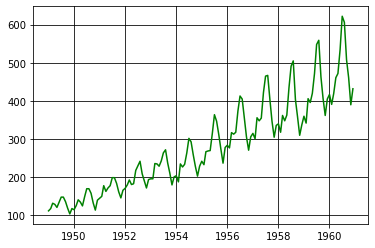

In [12]:
plt.plot(airpas, color="green");
plt.grid(color="black")

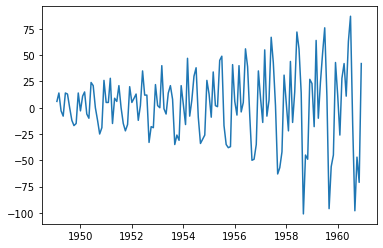

In [13]:
plt.plot(airpas.diff());# is series after 1st level of differencing?

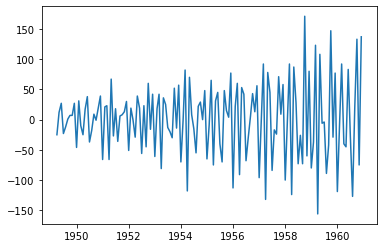

In [14]:
plt.plot(airpas.diff().diff().diff());

In [15]:
# even aftwer multimple level of diff series does not becomes stationary

In [16]:
airpas_log=np.log(airpas)

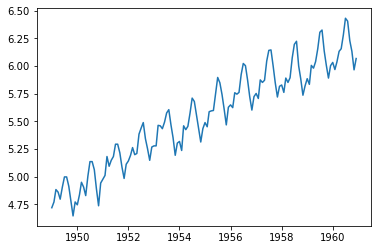

In [17]:
plt.plot(airpas_log)
#is stll stationary

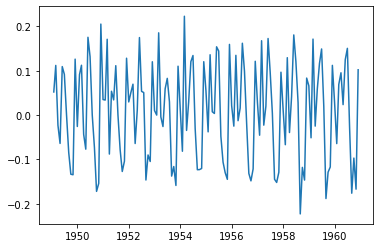

In [18]:
plt.plot(airpas_log.diff())
#is stll stationary

In [19]:
#when we do forecasting ,forecasting would also be in log
# so we need to take anti log to get the data in some range(scale)

In [20]:
# for building model we should need to know 3 things(p,d,q) d=1

In [21]:
#to find p and q lets use ACF AND PACF

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

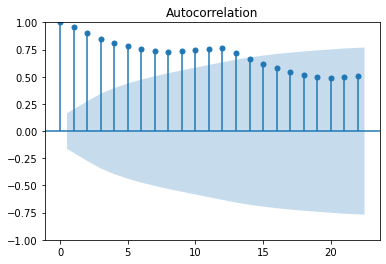

In [23]:
plot_acf(airpas_log.Passengers);

C:\Users\shuarya\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


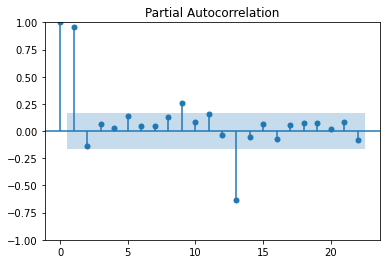

In [24]:
plot_pacf(airpas_log.Passengers);

In [25]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(airpas.Passengers, order=(2,1,0))

#whatever value u get (p & q)they are just a indiaction 
#p and q are hyper parameter

In [26]:
result=model.fit()

In [27]:
result.params

ar.L1       0.381478
ar.L2      -0.227857
sigma2    977.553759
dtype: float64

In [28]:
# linear regression(slope and coeff)

In [29]:
fore_values=result.forecast(steps=12) #long the forecast for next 12 time period
fore_values
#now lets plot the forcasted values and try to study then

1961-01-01    464.199926
1961-02-01    466.913499
1961-03-01    460.611689
1961-04-01    457.589380
1961-05-01    457.872347
1961-06-01    458.668947
1961-07-01    458.908356
1961-08-01    458.818175
1961-09-01    458.729221
1961-10-01    458.715836
1961-11-01    458.730998
1961-12-01    458.739832
Freq: MS, Name: predicted_mean, dtype: float64

In [30]:
# is the forecasted values good or bad?????

In [31]:
df=pd.DataFrame()
df["Predicated"]=fore_values
date_for_pred= ['1961-01-01','1961-02-01','1961-03-01','1961-04-01','1961-05-01','1961-06-01',
                 '1961-07-01','1961-08-01','1961-09-01','1961-10-01','1961-11-01','1961-12-01']

df['Month'] = date_for_pred
df.Month=pd.to_datetime(df.Month,infer_datetime_format= True)

df = df.set_index(['Month'])

df.head()


,Predicated
Month,
1961-01-01,464.199926
1961-02-01,466.913499
1961-03-01,460.611689
1961-04-01,457.589380
1961-05-01,457.872347


<AxesSubplot:xlabel='Month'>

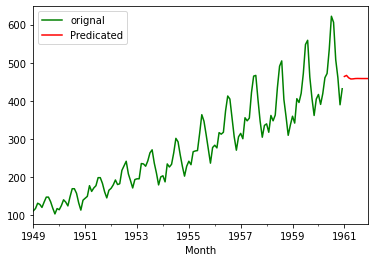

In [32]:
airpas["Passengers"].plot(legend=True,label='orignal',color="green")
df["Predicated"].plot(legend=True, label="Predicated",color="Red")


# model is already build 
# also done forecsting 
# judge performance of the model  
#

#problem associated with ARIMA (it can not handle seasonality, your data is seasonal)
# arima can  not handle  seasonalality data
#your data seasonal u go direct with SARIMA
# if u dont have seasonal u can also shift to direct sarima

# Next Day

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

In [34]:
result=seasonal_decompose(airpas_log)

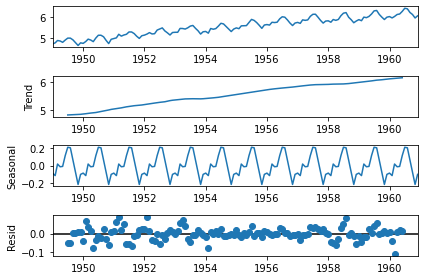

In [35]:
result.plot();
# this plot is just to get the idea about your data

In [36]:
auto_arima(airpas_log,seasonal=True,m=12)

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [37]:
# order=(2, 0, 0)p,d,q
# seasonal_order=(0, 1, 1, 12),p,d,q ,seasonal
#what ever values u get from autosarima pass them in sarima

In [38]:
model_sarima=SARIMAX(airpas_log,order=(2,0,0),seasonal_order=(0, 1, 1, 12))

In [39]:
airpas_model=model_sarima.fit()

In [44]:
pred_values=airpas_model.predict(start=144,end=155)
pred_values

1961-01-01    6.103801
1961-02-01    6.045743
1961-03-01    6.162403
1961-04-01    6.188829
1961-05-01    6.220846
1961-06-01    6.355766
1961-07-01    6.493087
1961-08-01    6.487429
1961-09-01    6.307934
1961-10-01    6.191062
1961-11-01    6.044277
1961-12-01    6.147581
Freq: MS, Name: predicted_mean, dtype: float64

In [45]:
pred_values1=np.exp(pred_values)

In [47]:
pred_values1.round()

1961-01-01    448.0
1961-02-01    422.0
1961-03-01    475.0
1961-04-01    487.0
1961-05-01    503.0
1961-06-01    576.0
1961-07-01    661.0
1961-08-01    657.0
1961-09-01    549.0
1961-10-01    488.0
1961-11-01    422.0
1961-12-01    468.0
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Month'>

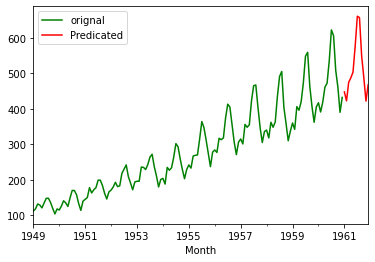

In [48]:
df=pd.DataFrame()
df["Predicated"]=pred_values1
date_for_pred= ['1961-01-01','1961-02-01','1961-03-01','1961-04-01','1961-05-01','1961-06-01',
                 '1961-07-01','1961-08-01','1961-09-01','1961-10-01','1961-11-01','1961-12-01']

df['Month'] = date_for_pred
df.Month=pd.to_datetime(df.Month,infer_datetime_format= True)

df = df.set_index(['Month'])

df.head()


airpas["Passengers"].plot(legend=True,label='orignal',color="green")
df["Predicated"].plot(legend=True, label="Predicated",color="Red")
